In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os, pathlib
import json, yaml

In [182]:
generalist = [5.686223507, 6.548550129, 6.928010941, 7.398015976, 7.69802618, 7.94879818, 8.114271164, 8.215163231, 8.281991005, 8.355433464, 8.677797318]
ens_k02 = [6.84025383, 7.742192268, 8.231931686, 8.443144798, 8.643162727, 8.580467224, 8.563150406, 8.527976036, 8.501693726, 8.712542534, 8.692625046]
ens_k05 = [6.957210064, 7.832043171, 8.47081852, 8.809029579, 8.741933823, 8.733032227, 8.852437973, 8.781518936, 8.759672165, 8.872569084, 8.814095497]
ens_k10 = [7.015823364, 7.542653561, 8.185555458, 8.488783836, 8.790095329, 8.522863388, 8.68051815, 8.662991524, 8.597190857, 8.624459267, 8.565448761]
ens_k02_ft = [7.110275269, 7.744691372, 8.31920433, 8.699014664, 8.841263771, 8.781739235, 8.806025505, 8.703619957, 8.978776932, 8.824645042, 8.882716179]
ens_k05_ft = [6.898943901, 7.730560303, 8.211076736, 8.259843826, 8.492754936, 8.565877914, 8.622514725, 8.548786163, 8.39942646, 8.53322506, 8.602754593]
ens_k10_ft = [7.078063965, 7.959559917, 8.497774124, 8.537317276, 8.707564354, 8.822164536, 8.856711388, 8.773005486, 8.71143055, 8.822630882, 8.845158577]

# Plot Test SI-SDR Improvement

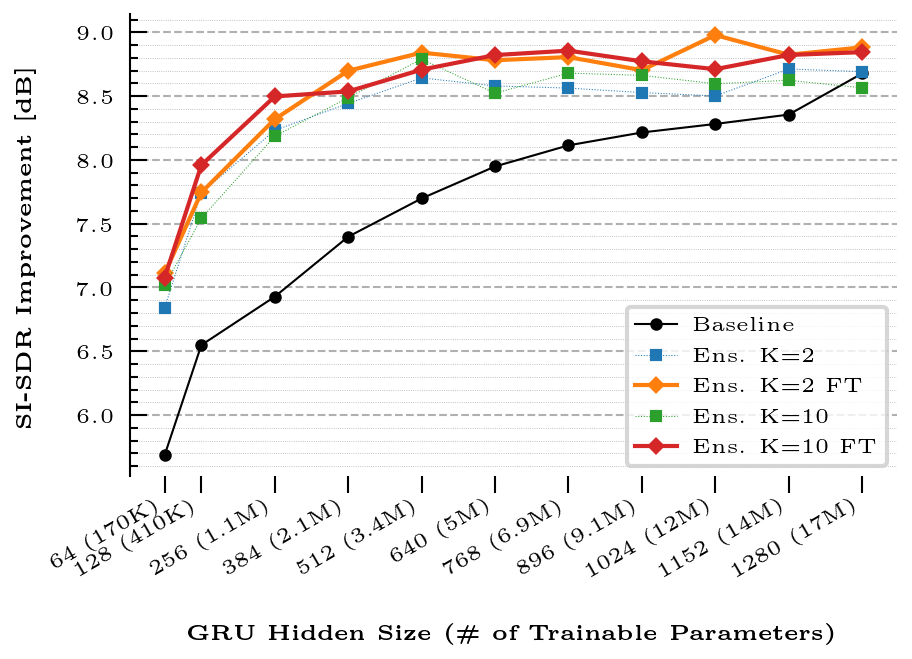

In [217]:
plt.style.use(['science', 'ieee'])
plt.rcParams['text.latex.preamble'] = '' #r'\renewcommand\bfdefault{b}'

c_blue = '#332288'
c_green = '#117733'
c_teal = '#44AA99'
c_sky = '#88CCEE'
c_gold = '#DDCC77'
c_pink = '#CC6677'
c_violet = '#AA4499'
c_red = '#D50000'

g_markersize = 2
g_labelsize = 5
g_labelpad = 10

fig, ax = plt.subplots(figsize=(3.3, 2), dpi=300)

l = None
hs = [64, 128, 256, 384, 512, 640, 768, 896, 1024, 1152, 1280][:l]
n_params = [169473, 412161, 1118721, 2120193, 3416577, 5007873, 6894081, 9075201, 11551233, 14322177, 17388033]
labels = ['{} ({})'.format(v1, human_format(v2)) for (v1, v2) in zip(hs, n_params)]
x = hs
colors = iter([plt.cm.tab10(i) for i in range(20)])
ax.plot(x[:l], generalist[:l], marker='o', linestyle='-', linewidth=0.5, markersize=2, label='Baseline', c='k')
ax.plot(x[:l], ens_k02[:l], marker='s', linestyle=':', linewidth=0.25, markersize=2, label='Ens. K=2', c=next(colors))
ax.plot(x[:l], ens_k02_ft[:l], marker='D', linestyle='-', linewidth=1, markersize=2, label='Ens. K=2 FT', c=next(colors))
# ax.plot(x[:l], ens_k05[:l], marker='s', linestyle=':', linewidth=0.25, markersize=2, label='Ens. K=5', c=next(colors))
# ax.plot(x[:l], ens_k05_ft[:l], marker='D', linestyle='-', linewidth=0.5, markersize=2, label='Ens. K=5 FT', c=next(colors))
ax.plot(x[:l], ens_k10[:l], marker='s', linestyle=':', linewidth=0.25, markersize=2, label='Ens. K=10', c=next(colors))
ax.plot(x[:l], ens_k10_ft[:l], marker='D', linestyle='-', linewidth=1, markersize=2, label='Ens. K=10 FT', c=next(colors))
ax.set_xticks(x[:l])
ax.set_xticklabels(labels, rotation=30, ha='right')

# secax = ax.secondary_xaxis('top')
# secax.tick_params(axis='x', which='major', labelsize=g_labelsize, length=0.01, top=False, bottom=False)
# def human_format(num):
#     num = float('{:.2g}'.format(num))
#     magnitude = 0
#     while abs(num) >= 1000:
#         magnitude += 1
#         num /= 1000.0
#     return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])
# #     ax.set_xscale('log')
# secax.set_xticks(hs)
# # secax.set_xticklabels(['cat'])
# # secax.set_xticklabels([str(k) for k in hs], fontsize=g_labelsize)
# # ax.set_xticklabels([human_format(k) for k in n_params], fontsize=g_labelsize)
# secax.set_xlabel(r'\textbf{Number of Parameters}', fontsize=g_labelsize, labelpad=g_labelpad)
# secax.xaxis.set_major_formatter(lambda x, pos: human_format(x))

# ax.text()

# ax.set_yticks(np.arange(4, 14))

ax.set_ylabel(r'\textbf{SI-SDR Improvement [dB]}', fontsize=g_labelsize, labelpad=g_labelpad)
ax.set_xlabel(r'\textbf{GRU Hidden Size (\# of Trainable Parameters)}', fontsize=g_labelsize, labelpad=g_labelpad)

ax.grid(which='major', axis='y', linestyle='--')
ax.grid(which='minor', axis='y', linestyle=':', linewidth=0.2)
ax.tick_params(axis='x', which='major', labelsize=g_labelsize, length=4, pad=0, direction='out', top=False)
ax.tick_params(axis='y', which='major', labelsize=g_labelsize, length=4, right=False)
ax.tick_params(axis='x', which='minor', top=False, bottom=False)
ax.tick_params(axis='y', which='minor', length=2, right=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend(loc="lower right", frameon=True, mode="", ncol=1, fontsize=g_labelsize)
# plt.savefig('fig_results.pdf', pad_inches=0)
plt.show()

# Plot Validation Losses

se-hs=0064_K=10_k=09 -13.458819389343262
se-hs=0128_K=10_k=09 -14.337495803833008
se-hs=0256_K=10_k=09 -14.794705390930176
se-hs=0384_K=10_k=09 -15.056427955627441
se-hs=0512_K=10_k=09 -15.173404693603516
se-hs=0640_K=10_k=09 -15.135246276855469
se-hs=0768_K=10_k=09 -15.134252548217773
se-hs=0896_K=10_k=09 -15.250186920166016
se-hs=1024_K=10_k=09 -15.177583694458008
se-hs=1152_K=10_k=09 -15.060276985168457
se-hs=1280_K=10_k=09 -15.106298446655273


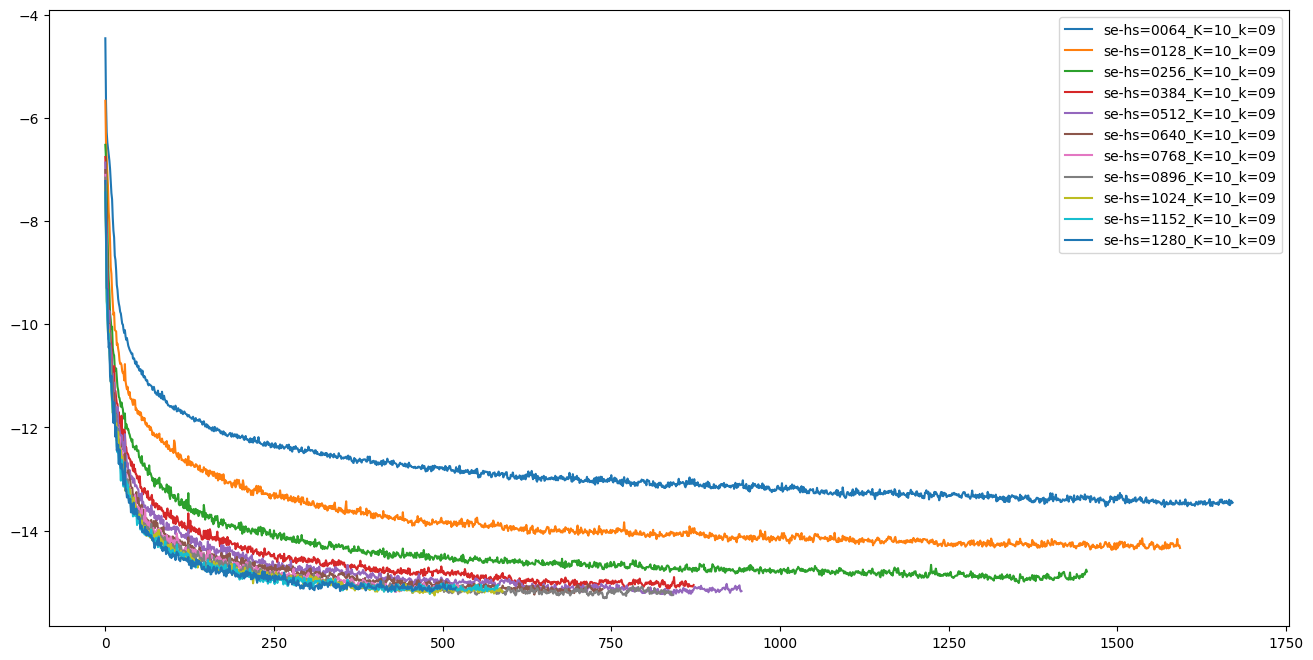

In [89]:
plt.style.use('default')
fig = plt.figure(figsize=(16,8))
for f in sorted(pathlib.Path('/media/sdb1/asivara/Research/2021_waspaa/weights/specialists/').rglob('errors.json')):
    if '_K=10_k=09' not in str(f):
        continue
    with open(f, 'r') as fp:
        l = json.load(fp)
        print(f.parent.stem, l[-1])
        plt.plot(l, label=f.parent.stem)

plt.legend()
plt.show()